In [1]:
import pandas as pd
df=pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Printing the summary of the Customers dataset


In [2]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


Printing the summary of the dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


Printing all the column headers in the Train dataset

In [4]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

Checking if there is any null value present in the actual dataset

In [5]:
df.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [6]:
X=df.iloc[:,[3,4]].values

In [7]:
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

Finding optimal no of clusters using the elbow method

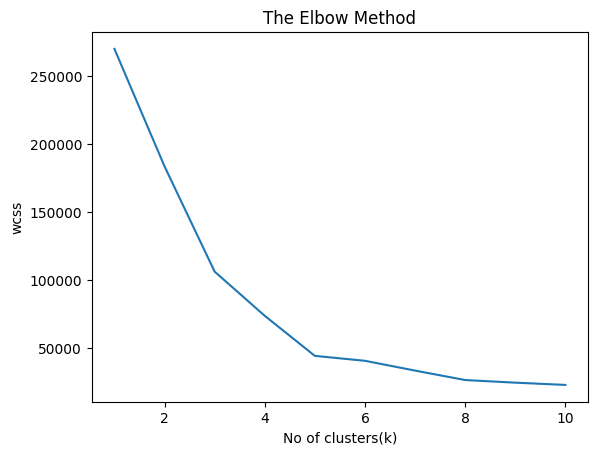

In [8]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
wcss=[]
for i in range(1,11):
    k=KMeans(n_clusters=i,init="k-means++",random_state=42)
    k.fit(X)
    wcss.append(k.inertia_)
plt.plot(range(1,11),wcss)
plt.title("The Elbow Method")
plt.xlabel("No of clusters(k)")
plt.ylabel("wcss")
plt.show()


Training the kmeans model on a dataset

In [9]:
k=KMeans(n_clusters=5,init="k-means++",random_state=42)
y_pred=k.fit_predict(X)

Visualisation of the clusters using scatter plot

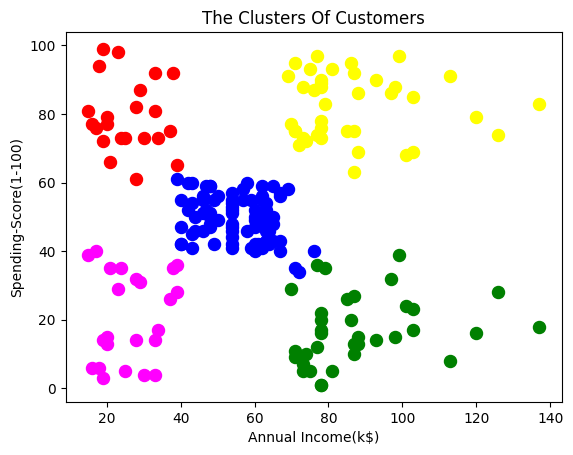

In [10]:
plt.scatter(X[y_pred==0,0],X[y_pred==0,1],s=75,c='blue',label='Cluster 1')
plt.scatter(X[y_pred==1,0],X[y_pred==1,1],s=75,c='yellow',label='Cluster 2')
plt.scatter(X[y_pred==2,0],X[y_pred==2,1],s=75,c='red',label='Cluster 3')
plt.scatter(X[y_pred==3,0],X[y_pred==3,1],s=75,c='green',label='Cluster 1')
plt.scatter(X[y_pred==4,0],X[y_pred==4,1],s=75,c='magenta',label='Cluster 1')
plt.title("The Clusters Of Customers")
plt.xlabel("Annual Income(k$)")
plt.ylabel("Spending-Score(1-100)")
plt.show()
